In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#load data
data_x = np.load('data_x_aumentated_normalized.npy') #images
data_y = np.load('data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  2368


In [6]:
VALIDATION_PERCENTAGE = 0.1

In [7]:
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

validation_x = data_x[:validation_size] #taking validation images from original data
validation_y = data_y[:validation_size]
data_x = data_x[validation_size:] #removing validation images from original data
data_y = data_y[validation_size:]

# **Splitting data in train - validation - test**

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [10]:
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [12]:
adam = tf.keras.optimizers.Adam(lr=0.001)

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
def define_model():
    K.set_image_data_format('channels_last')
    K.set_learning_phase(1)
    model = tf.keras.applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
        pooling=None,
        classes=NUM_CLASSES,
        # classifier_activation="softmax",
        # **kwargs
    )
    new_model = models.Sequential()
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #new_model.add(tf.keras.layers.l2( l=0.01))
    #new_model.add(layers.GlobalAveragePooling2D())
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
    new_model.add(tf.keras.layers.Activation('softmax'))
    return new_model

In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
epochs = 100
num_classes = 2
num_kfold=1
all_models = []

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 27s - loss: 1.7393 - accuracy: 0.6152 - val_loss: 11.1572 - val_accuracy: 0.2717 - 27s/epoch - 497ms/step
Epoch 2/100
54/54 - 16s - loss: 1.1299 - accuracy: 0.8317 - val_loss: 3.6612 - val_accuracy: 0.2717 - 16s/epoch - 293ms/step
Epoch 3/100
54/54 - 16s - loss: 0.8162 - accuracy: 0.9073 - val_loss: 5.1961 - val_accuracy: 0.2717 - 16s/epoch - 292ms/step
Epoch 4/100
54/54 - 16s - loss: 0.7056 - accuracy: 0.9079 - val_loss: 2.3756 - val_accuracy: 0.2529 - 16s/epoch - 293ms/step
Epoch 5/100
54/54 - 16s - loss: 0.5248 - accuracy: 0.9331 - val_loss: 4.9632 - val_accuracy: 0.2717 - 16s/epoch - 293ms/step
Epoch 6/100
54/54 - 16s - loss: 0.3945 - accuracy: 0.9525 - val_loss: 5.8711 - val_accuracy: 0.2717 - 16s/epoch - 293ms/step
Epoch 7/100
54/54 - 16s - loss: 0.3905 - accuracy: 0.9314 - val_loss: 3.2311 - val_accuracy: 0.2881 - 16s/epoch - 293ms/step
Epoch 8/100
54/54 - 16s - loss: 0.3427 - accuracy: 0.9384 - val_loss: 3.0216 - val_accuracy: 0.2717 - 16s/epoch - 293ms/step

Epoch 66/100
54/54 - 16s - loss: 3.7519e-04 - accuracy: 1.0000 - val_loss: 0.1760 - val_accuracy: 0.9578 - 16s/epoch - 298ms/step
Epoch 67/100
54/54 - 16s - loss: 3.8425e-04 - accuracy: 1.0000 - val_loss: 0.1778 - val_accuracy: 0.9578 - 16s/epoch - 298ms/step
Epoch 68/100
54/54 - 16s - loss: 3.5562e-04 - accuracy: 1.0000 - val_loss: 0.1758 - val_accuracy: 0.9555 - 16s/epoch - 298ms/step
Epoch 69/100
54/54 - 16s - loss: 3.4567e-04 - accuracy: 1.0000 - val_loss: 0.1733 - val_accuracy: 0.9578 - 16s/epoch - 298ms/step
Epoch 70/100
54/54 - 16s - loss: 3.5444e-04 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9578 - 16s/epoch - 299ms/step
Epoch 71/100
54/54 - 16s - loss: 3.5352e-04 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9602 - 16s/epoch - 299ms/step
Epoch 72/100
54/54 - 16s - loss: 3.3865e-04 - accuracy: 1.0000 - val_loss: 0.1749 - val_accuracy: 0.9578 - 16s/epoch - 299ms/step
Epoch 73/100
54/54 - 16s - loss: 3.0708e-04 - accuracy: 1.0000 - val_loss: 0.1779 - val_ac

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_1.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_1.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 22s - loss: 1.9249 - accuracy: 0.2745 - val_loss: 111118296.0000 - val_accuracy: 0.2459 - 22s/epoch - 412ms/step
Epoch 2/100
54/54 - 16s - loss: 1.5640 - accuracy: 0.2727 - val_loss: 1.5470 - val_accuracy: 0.2881 - 16s/epoch - 295ms/step
Epoch 3/100
54/54 - 16s - loss: 1.4481 - accuracy: 0.3355 - val_loss: 1.4780 - val_accuracy: 0.2459 - 16s/epoch - 295ms/step
Epoch 4/100
54/54 - 16s - loss: 1.3335 - accuracy: 0.3560 - val_loss: 1.4903 - val_accuracy: 0.2623 - 16s/epoch - 295ms/step
Epoch 5/100
54/54 - 16s - loss: 1.2917 - accuracy: 0.3801 - val_loss: 1.4917 - val_accuracy: 0.2623 - 16s/epoch - 295ms/step
Epoch 6/100
54/54 - 16s - loss: 1.1899 - accuracy: 0.4323 - val_loss: 1.5319 - val_accuracy: 0.2623 - 16s/epoch - 295ms/step
Epoch 7/100
54/54 - 16s - loss: 1.0985 - accuracy: 0.4680 - val_loss: 1.5692 - val_accuracy: 0.2623 - 16s/epoch - 296ms/step
Epoch 8/100
54/54 - 16s - loss: 1.0194 - accuracy: 0.5155 - val_loss: 1.5464 - val_accuracy: 0.2248 - 16s/epoch - 297

Epoch 66/100
54/54 - 16s - loss: 0.0779 - accuracy: 0.9795 - val_loss: 7.4365 - val_accuracy: 0.3372 - 16s/epoch - 300ms/step
Epoch 67/100
54/54 - 16s - loss: 0.0832 - accuracy: 0.9830 - val_loss: 0.8691 - val_accuracy: 0.8009 - 16s/epoch - 304ms/step
Epoch 68/100
54/54 - 16s - loss: 0.0493 - accuracy: 0.9883 - val_loss: 1.3582 - val_accuracy: 0.6885 - 16s/epoch - 302ms/step
Epoch 69/100
54/54 - 16s - loss: 0.0354 - accuracy: 0.9924 - val_loss: 1.5363 - val_accuracy: 0.7049 - 16s/epoch - 301ms/step
Epoch 70/100
54/54 - 16s - loss: 0.0253 - accuracy: 0.9971 - val_loss: 0.4117 - val_accuracy: 0.8876 - 16s/epoch - 299ms/step
Epoch 71/100
54/54 - 16s - loss: 0.0228 - accuracy: 0.9953 - val_loss: 0.6872 - val_accuracy: 0.8361 - 16s/epoch - 300ms/step
Epoch 72/100
54/54 - 16s - loss: 0.0209 - accuracy: 0.9988 - val_loss: 2.2234 - val_accuracy: 0.6440 - 16s/epoch - 299ms/step
Epoch 73/100
54/54 - 16s - loss: 0.0184 - accuracy: 0.9994 - val_loss: 0.9131 - val_accuracy: 0.8056 - 16s/epoch - 299

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_2.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_2.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 25s - loss: 1.9677 - accuracy: 0.3107 - val_loss: 135002624.0000 - val_accuracy: 0.2488 - 25s/epoch - 455ms/step
Epoch 2/100
54/54 - 16s - loss: 1.4277 - accuracy: 0.4426 - val_loss: 7364.6621 - val_accuracy: 0.2512 - 16s/epoch - 296ms/step
Epoch 3/100
54/54 - 16s - loss: 1.2021 - accuracy: 0.4959 - val_loss: 1.5410 - val_accuracy: 0.2488 - 16s/epoch - 296ms/step
Epoch 4/100
54/54 - 16s - loss: 1.0673 - accuracy: 0.5528 - val_loss: 1.5883 - val_accuracy: 0.2512 - 16s/epoch - 299ms/step
Epoch 5/100
54/54 - 16s - loss: 0.9743 - accuracy: 0.6108 - val_loss: 1.7652 - val_accuracy: 0.2512 - 16s/epoch - 302ms/step
Epoch 6/100
54/54 - 16s - loss: 0.8121 - accuracy: 0.6688 - val_loss: 2.2084 - val_accuracy: 0.2512 - 16s/epoch - 301ms/step
Epoch 7/100
54/54 - 16s - loss: 0.6872 - accuracy: 0.7274 - val_loss: 1.9522 - val_accuracy: 0.2394 - 16s/epoch - 302ms/step
Epoch 8/100
54/54 - 16s - loss: 0.5776 - accuracy: 0.7919 - val_loss: 2.5040 - val_accuracy: 0.2559 - 16s/epoch - 

Epoch 66/100
54/54 - 16s - loss: 6.1853e-04 - accuracy: 1.0000 - val_loss: 0.1656 - val_accuracy: 0.9507 - 16s/epoch - 300ms/step
Epoch 67/100
54/54 - 16s - loss: 6.1688e-04 - accuracy: 1.0000 - val_loss: 0.1761 - val_accuracy: 0.9577 - 16s/epoch - 301ms/step
Epoch 68/100
54/54 - 16s - loss: 6.0113e-04 - accuracy: 1.0000 - val_loss: 0.1659 - val_accuracy: 0.9507 - 16s/epoch - 301ms/step
Epoch 69/100
54/54 - 16s - loss: 6.0584e-04 - accuracy: 1.0000 - val_loss: 0.1718 - val_accuracy: 0.9507 - 16s/epoch - 300ms/step
Epoch 70/100
54/54 - 16s - loss: 5.7170e-04 - accuracy: 1.0000 - val_loss: 0.1765 - val_accuracy: 0.9554 - 16s/epoch - 300ms/step
Epoch 71/100
54/54 - 16s - loss: 5.3115e-04 - accuracy: 1.0000 - val_loss: 0.1710 - val_accuracy: 0.9531 - 16s/epoch - 300ms/step
Epoch 72/100
54/54 - 16s - loss: 5.6212e-04 - accuracy: 1.0000 - val_loss: 0.1740 - val_accuracy: 0.9531 - 16s/epoch - 300ms/step
Epoch 73/100
54/54 - 16s - loss: 5.1680e-04 - accuracy: 1.0000 - val_loss: 0.1702 - val_ac

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_3.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_3.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 23s - loss: 2.0012 - accuracy: 0.2597 - val_loss: 313116064.0000 - val_accuracy: 0.2300 - 23s/epoch - 434ms/step
Epoch 2/100
54/54 - 16s - loss: 1.6239 - accuracy: 0.2479 - val_loss: 2544.6938 - val_accuracy: 0.2300 - 16s/epoch - 296ms/step
Epoch 3/100
54/54 - 16s - loss: 1.4919 - accuracy: 0.2638 - val_loss: 505.7471 - val_accuracy: 0.2300 - 16s/epoch - 296ms/step
Epoch 4/100
54/54 - 16s - loss: 1.4560 - accuracy: 0.2691 - val_loss: 1.4512 - val_accuracy: 0.2512 - 16s/epoch - 296ms/step
Epoch 5/100
54/54 - 16s - loss: 1.4840 - accuracy: 0.2585 - val_loss: 1.4300 - val_accuracy: 0.2512 - 16s/epoch - 296ms/step
Epoch 6/100
54/54 - 16s - loss: 1.4320 - accuracy: 0.2860 - val_loss: 1.4246 - val_accuracy: 0.2582 - 16s/epoch - 298ms/step
Epoch 7/100
54/54 - 16s - loss: 1.3580 - accuracy: 0.3617 - val_loss: 1.4480 - val_accuracy: 0.2606 - 16s/epoch - 298ms/step
Epoch 8/100
54/54 - 16s - loss: 1.0896 - accuracy: 0.5158 - val_loss: 1.5523 - val_accuracy: 0.2606 - 16s/epoch 

Epoch 66/100
54/54 - 16s - loss: 8.1091e-04 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.9437 - 16s/epoch - 301ms/step
Epoch 67/100
54/54 - 16s - loss: 7.9218e-04 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9366 - 16s/epoch - 301ms/step
Epoch 68/100
54/54 - 16s - loss: 7.8858e-04 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 0.9437 - 16s/epoch - 300ms/step
Epoch 69/100
54/54 - 16s - loss: 7.8584e-04 - accuracy: 1.0000 - val_loss: 0.2735 - val_accuracy: 0.9366 - 16s/epoch - 301ms/step
Epoch 70/100
54/54 - 16s - loss: 7.5556e-04 - accuracy: 1.0000 - val_loss: 0.2695 - val_accuracy: 0.9437 - 16s/epoch - 301ms/step
Epoch 71/100
54/54 - 16s - loss: 7.2275e-04 - accuracy: 1.0000 - val_loss: 0.2679 - val_accuracy: 0.9413 - 16s/epoch - 301ms/step
Epoch 72/100
54/54 - 16s - loss: 6.7321e-04 - accuracy: 1.0000 - val_loss: 0.2659 - val_accuracy: 0.9460 - 16s/epoch - 301ms/step
Epoch 73/100
54/54 - 16s - loss: 6.8313e-04 - accuracy: 1.0000 - val_loss: 0.2818 - val_ac

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_4.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_4.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_4/resnet50/conv5_block3_2_conv/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "C:\Users\tmcle\.conda\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\tmcle\.conda\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\tmcle\.conda\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\tmcle\.conda\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\tmcle\.conda\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\tmcle\AppData\Local\Temp\ipykernel_2520\796579774.py", line 5, in <module>
      history = new_model.fit(data_x[train], data_y[train],
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_4/resnet50/conv5_block3_2_conv/Conv2D/Conv2DBackpropFilter'
OOM when allocating tensor with shape[512,512,3,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_4/resnet50/conv5_block3_2_conv/Conv2D/Conv2DBackpropFilter}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_356804]

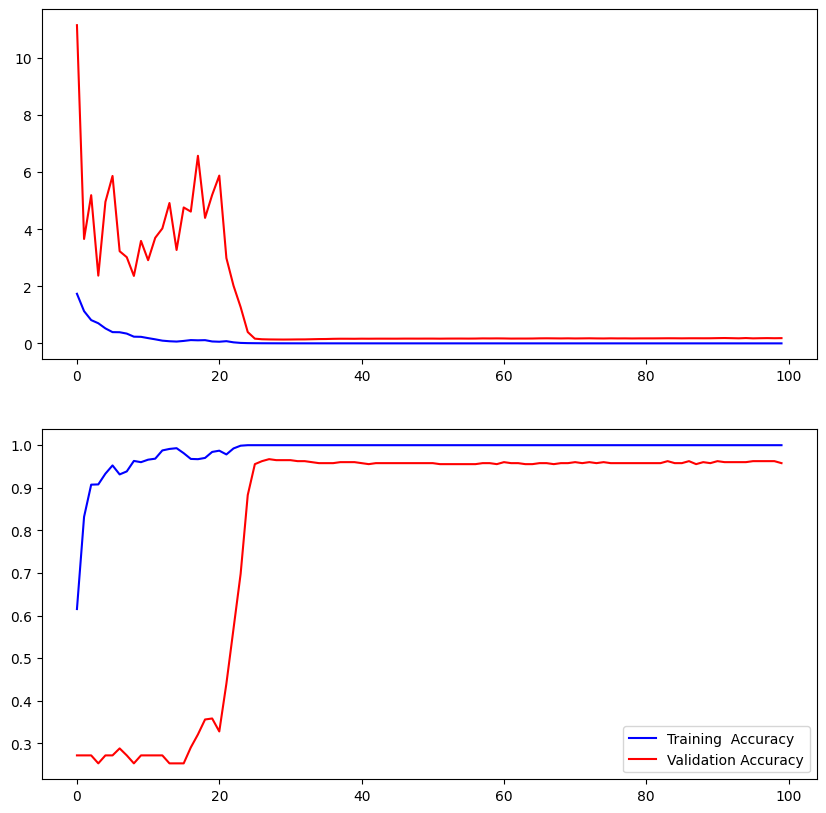

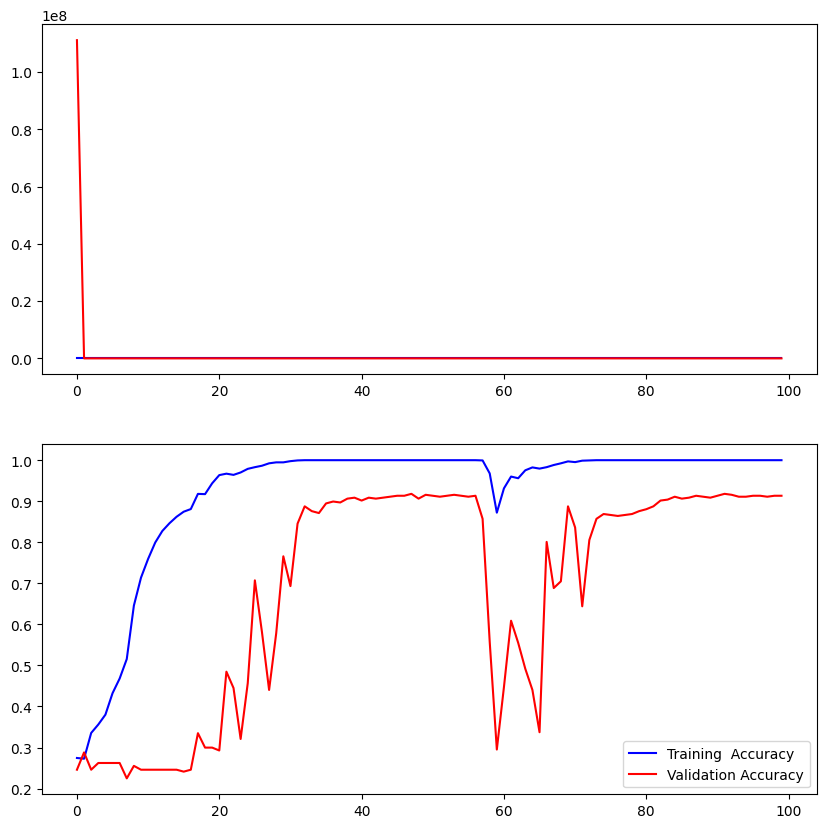

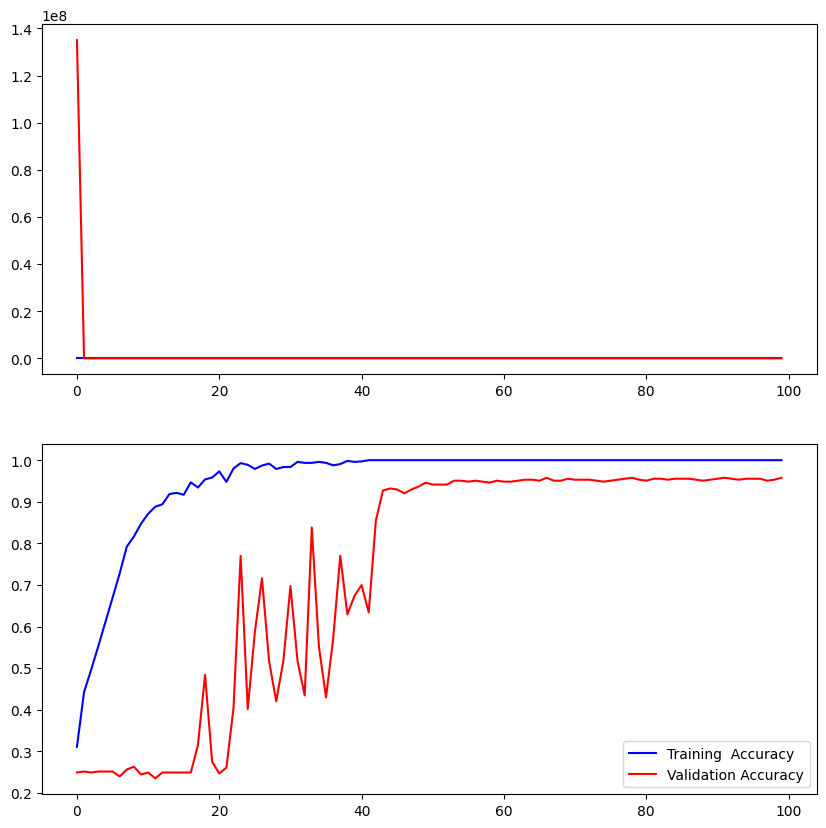

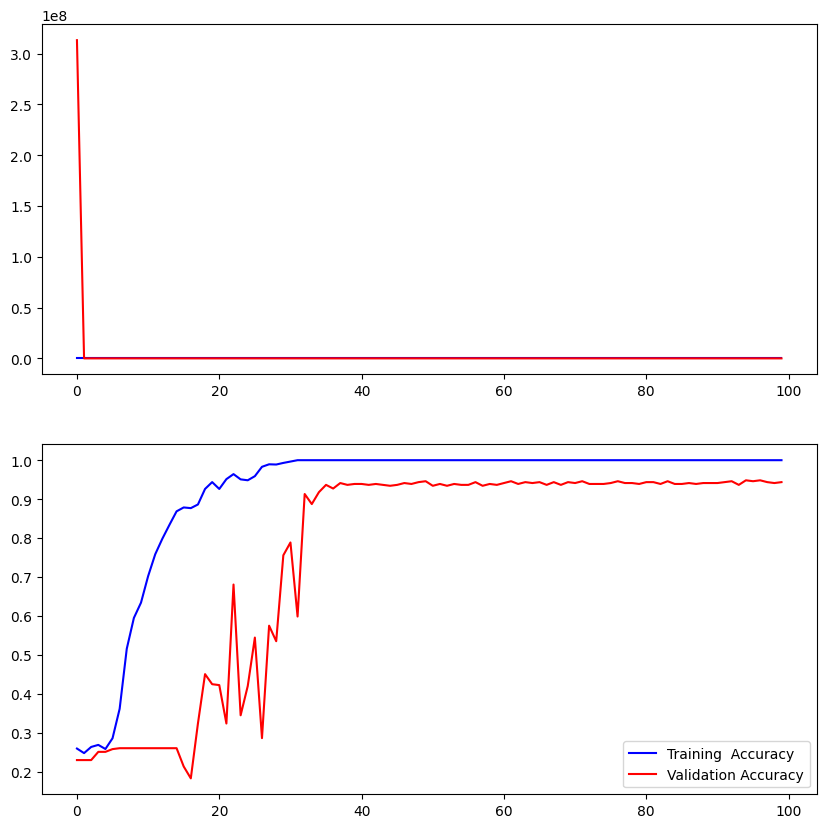

In [15]:
for train, test in kfold.split (data_x, data_y):
    new_model = define_model()

    new_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    history = new_model.fit(data_x[train], data_y[train],
                                epochs=epochs,verbose=2,validation_data=(data_x[test], data_y[test]), shuffle=False)

    new_model.history.history.keys()
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(new_model.history.history['loss'],color='b',label='Training Loss')
    ax[0].plot(new_model.history.history['val_loss'],color='r',label='Validation Loss')

    #Plotting the training accuracy and validation accuracy
    ax[1].plot(new_model.history.history['accuracy'],color='b',label='Training  Accuracy')
    ax[1].plot(new_model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

    plt.legend()
    print('Accuracy Score = ',np.max(history.history['val_accuracy']))

    scores = new_model.evaluate(validation_x,validation_y,verbose=0)
    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
    
    new_model.save(f'resnet50_100epochs_augmented_kfold_{str(num_kfold)}.npy')
    all_models.append(new_model)
    num_kfold = num_kfold + 1

In [ ]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))

**Random forest - flatting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
cvscores_rf = []
for new_model in all_models:
    new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
    featureVector = new_model_rf.predict(data_x)
    featureVector2 = new_model_rf.predict(validation_x)
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(featureVector,data_y)
    y_pred=clf.predict(featureVector2)
    score = metrics.accuracy_score(validation_y, y_pred)
    cvscores_rf.append(score)
    print("Accuracy:",score)

In [ ]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores_rf),np.std(cvscores_rf)))

# **Testes**

In [ ]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [ ]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

In [ ]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
cm = confusion_matrix(test_y, pred_probs)

In [ ]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)